## INTRODUCTION

This notebook contains data cleaning and visualisation along with Linear modelling. The dataset taken is for **House Sales in King Country, USA**. This includes houses sold between May 2014 and May 2015. The main agenda about this notebook is to take the relevant features to predict the house prices in USA.

The dataset contains 20 house features plus the price, along with 21613 observations.

The description for the **20 features** is given below: 

1. id :- It is the unique numeric number assigned to each house being sold. 
2. date :- It is the date on which the house was sold out. 
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features. 
4. bedrooms :- It determines number of bedrooms in a house. 
5. bathrooms :- It determines number of bathrooms in a bedroom of a house. 
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot. 
7. sqft_lot : It is also the measurement variable which determines square foot of the lot. 
8. floors: It determines total floors means levels of house. 
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes. 
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes. 
11. condition : It determines the overall condition of a house on a scale of 1 to 5. 
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11. 
13. sqft_above : It determines square footage of house apart from basement. 
14. sqft_basement : It determines square footage of the basement of the house. 
15. yr_built : It detrmines the date of building of the house. 
16. yr_renovated : It detrmines year of renovation of house. 
17. zipcode : It determines the zipcode of the location of the house. 
18. lat : It determines the latitude of the location of the house. 
19. long : It determines the longitude of the location of the house. 
20. sqft_living15 : Living room area in 2015(implies-- some renovations) 
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)


## 1. IMPORTING LIBRARIES, DATA CLEANING AND PRE-PROCESSING

In [95]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # To ignore some of seaborn warning msg
warnings.filterwarnings('ignore')
import os
from datetime import datetime

import scipy.stats as stats # To calculate coefficient r for different types of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor #To calc VIF to identify multicolinearity
import statsmodels.api as sm
from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # To encode categorical variables
from sklearn.model_selection import train_test_split # To split train and test dataset
from sklearn.model_selection import cross_val_score # To perform cross validation


In [96]:
# Importing the dataset by reading it from CSV file and inspect the first 5 rows

dataset = pd.read_csv("../Assignment 3 - Ami Gandhi/kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The above dataset shows it contains 21 columns. Now, lets inspect all the columns of this dataset along with its datatypes.

In [97]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here, we see there is inconsistency with the datatypes of few columns. Lets proceed and set relevant datatype for the same.

In [98]:
# convert date column to datetime

dataset.date = pd.to_datetime(dataset.date, format='%Y%m%dT%H%M%S')

In [99]:
# convert categorical columns to categorical types

dataset['waterfront'] = dataset['waterfront'].astype('category',ordered=True)
dataset['view'] = dataset['view'].astype('category',ordered=True)
dataset['condition'] = dataset['condition'].astype('category',ordered=True)
dataset['grade'] = dataset['grade'].astype('category',ordered=False)
dataset['bedrooms'] = dataset['bedrooms'].astype('category',ordered=True)
dataset['bathrooms'] = dataset['bathrooms'].astype('category',ordered=True)
dataset['floors'] = dataset['floors'].astype('category',ordered=True)

In [100]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [101]:
# checking the updated datatypes

dataset.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms               category
bathrooms              category
sqft_living               int64
sqft_lot                  int64
floors                 category
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [102]:
# descriptive statistics
dataset.shape

(21613, 21)

Let's summarize the main statistics of each parameters.

In [103]:
dataset.describe()

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,2079.899736,1.510697e+04,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,918.440897,4.142051e+04,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,1427.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,2550.000000,1.068800e+04,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [104]:
# check statistics for categorical variables as well
dataset.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.0,21613.0,21613.000000,2.161300e+04,21613.0,21613.0,21613.0,...,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,13.0,30.0,NaN,NaN,6.0,2.0,5.0,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-06-23 00:00:00,NaN,3.0,2.5,NaN,NaN,1.0,0.0,0.0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,9824.0,5380.0,NaN,NaN,10680.0,21450.0,19489.0,...,8981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,NaN,NaN,2079.899736,1.510697e+04,NaN,NaN,NaN,...,NaN,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,NaN,NaN,918.440897,4.142051e+04,NaN,NaN,NaN,...,NaN,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,NaN,NaN,290.000000,5.200000e+02,NaN,NaN,NaN,...,NaN,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,NaN,NaN,1427.000000,5.040000e+03,NaN,NaN,NaN,...,NaN,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000


From description we can infer that

1. Avg price of house sold in King County, USA is $540088

2. Max price of house sold in King County, USA is $7700000
3. Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house is having 33 Bedrooms
4. Avg area of house is 2079 Sqft with one house having maximum of 13540 Sqft. area

In [105]:
# check for null values

dataset.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null category
bathrooms        21613 non-null category
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null category
waterfront       21613 non-null category
view             21613 non-null category
condition        21613 non-null category
grade            21613 non-null category
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: category(7), datetime64[ns](1), float64(3), int64

The above inspection shows that data is pretty clean. There are no pesky nulls which we need to treat and most of the features are in numeric format.

Now, in order to predict the price of the houses, "id" and "date" columns has no impact and so these 2 features will not be used in this analysis. Let's go ahead and drop those columns.

In [107]:
# Dropping the id and date columns

dataset = dataset.drop(['id', 'date'],axis=1)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2. The target variable: price

Let us visualise the distribution of target variable, price

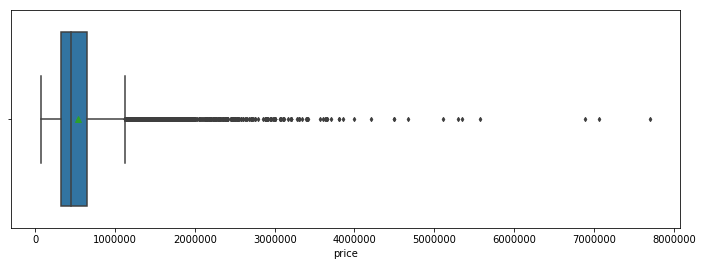

In [108]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = dataset, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

From the above plot, we see that there are a lot of outliers with few houses above $40,00,000. 

If we ignore outliers, the price range is illustrated by the distance between the opposite ends of the whiskers (1.5 IQR) - about 10,00,000$ here.

Also, we can see that the right whisker is slightly longer than the left whisker and that the median line is gravitating towards the left of the box. The distribution is therefore normal and slightly skewed to the right.

## 3. Data Visualisation - Association and correlation between the variables

Now, let us visualise the relationship between few features and dependent variable 'price' on the basis of number of bedrooms

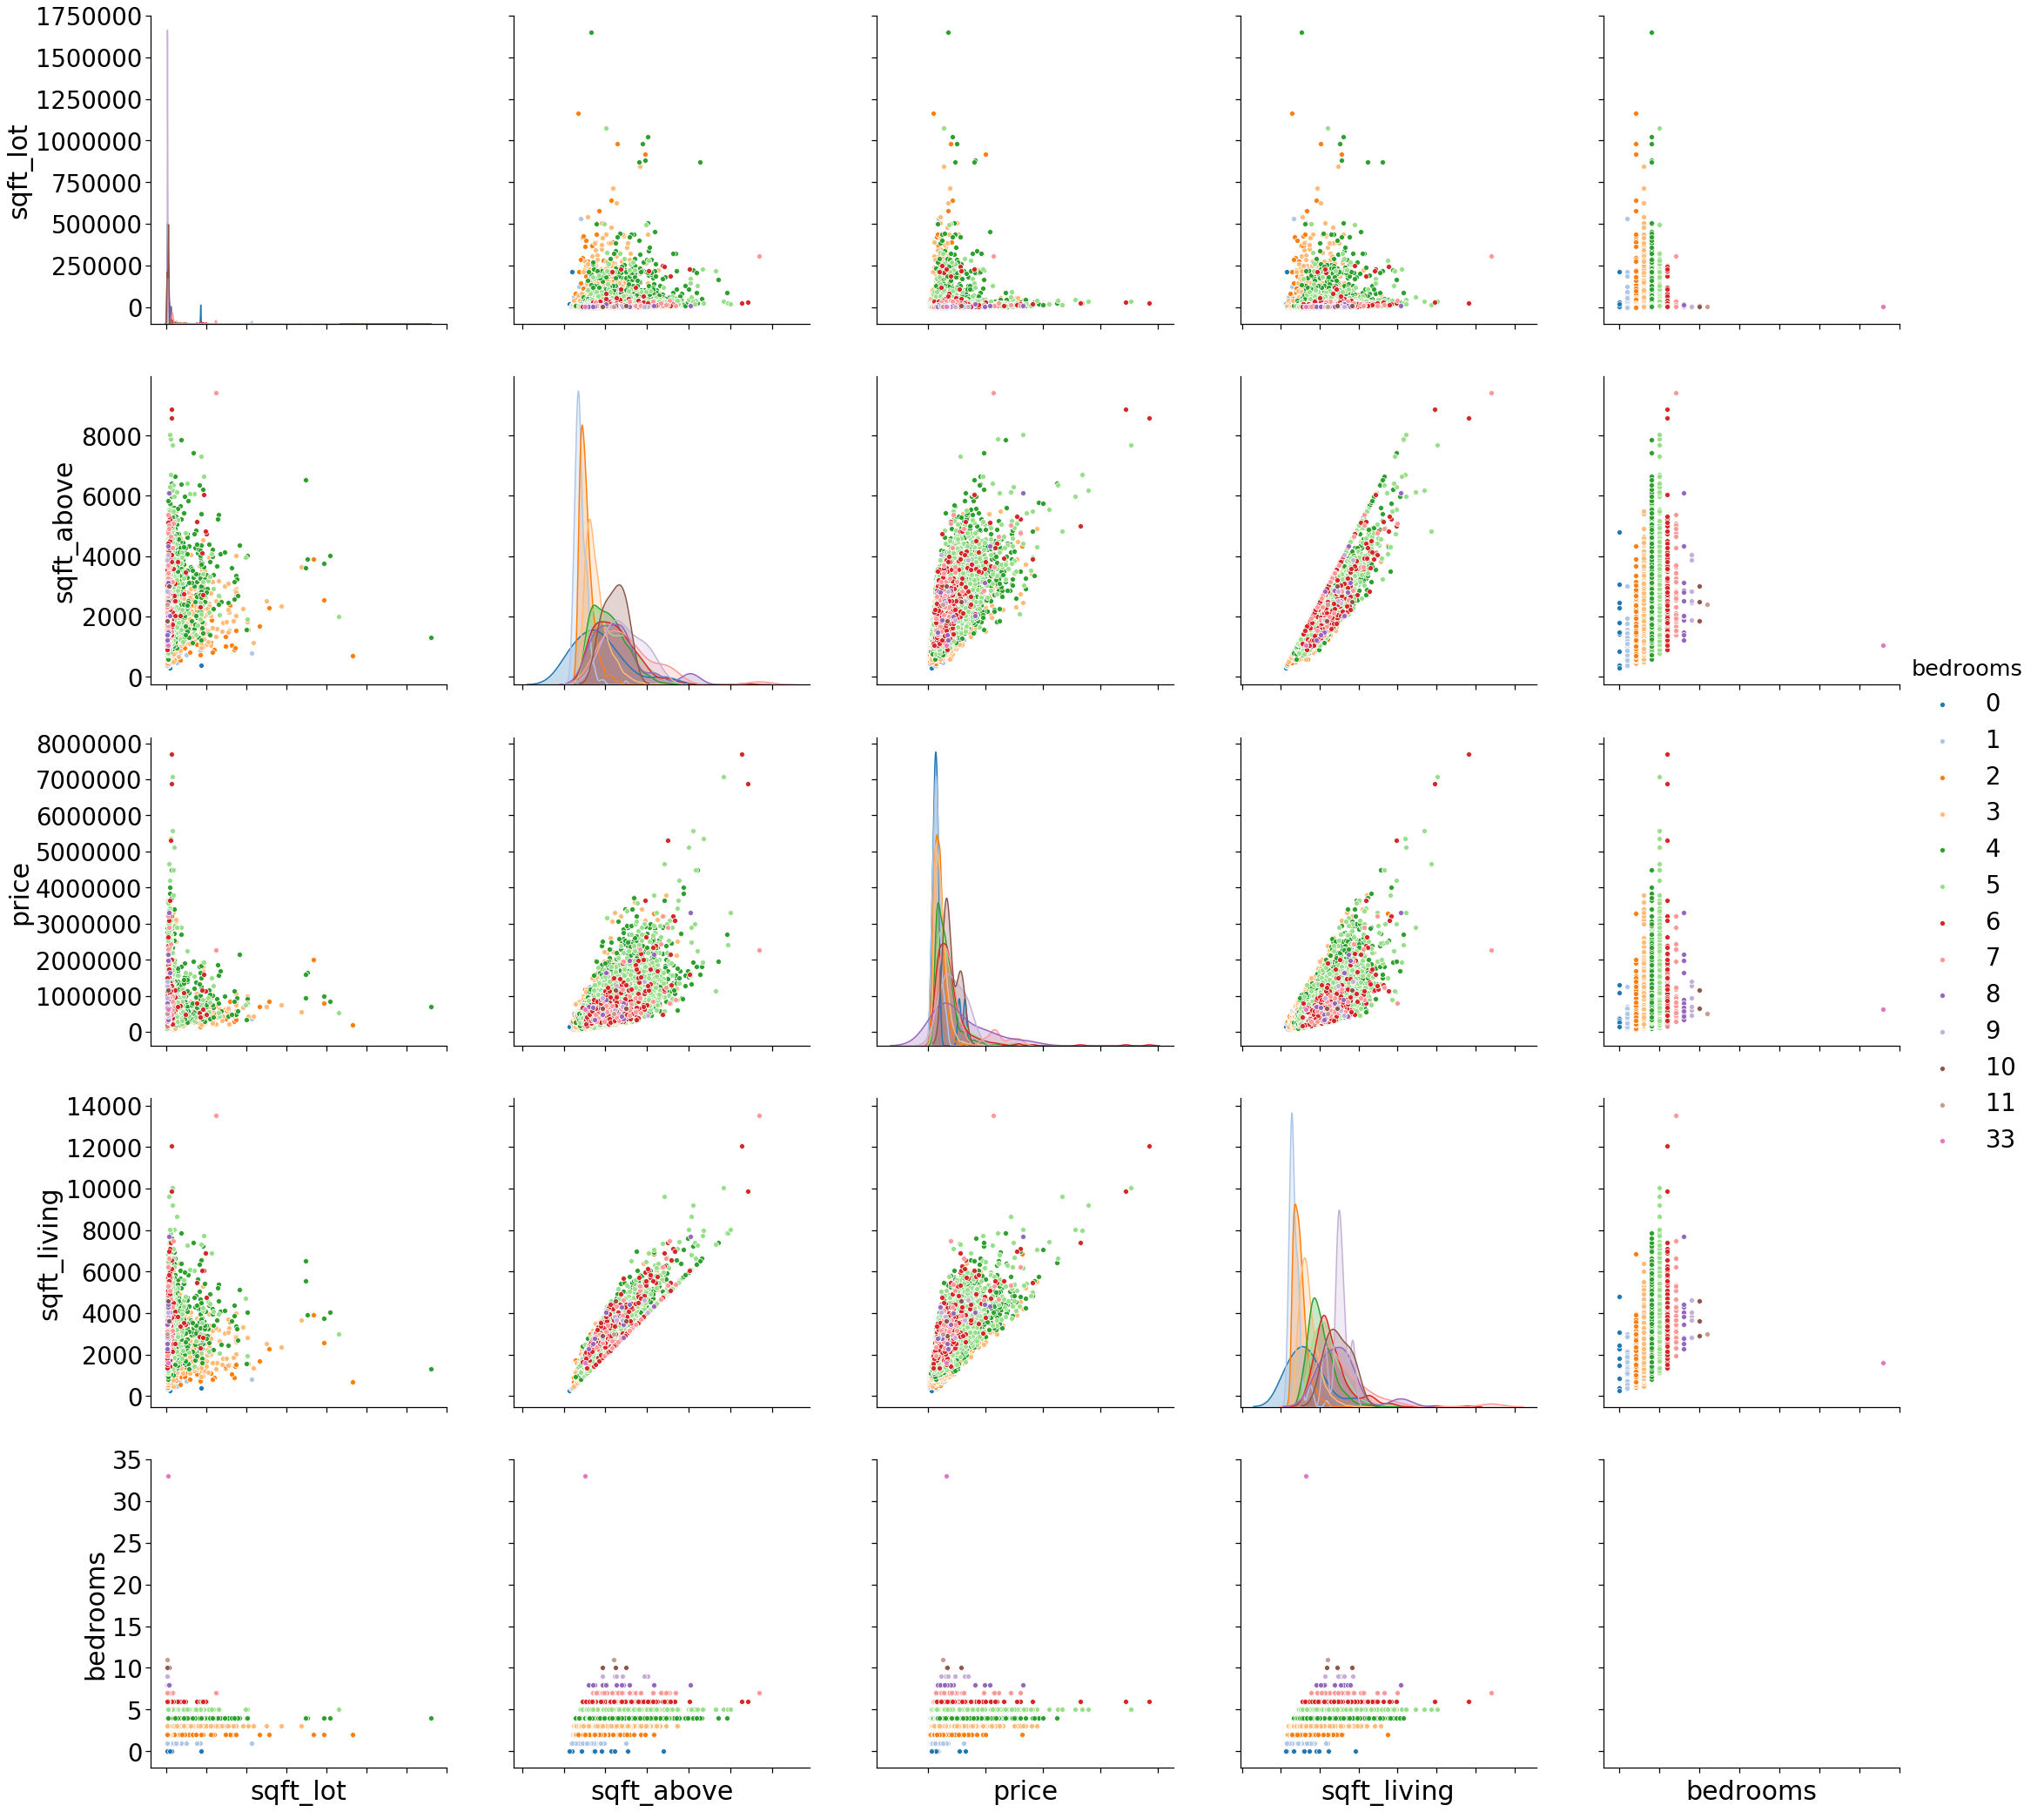

In [109]:
# Data visualisation using seaborn pairplot

with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

From the pairplots, we seem to get the classical linear distribution of the data points, for example with price against sqft_living. Thus in the latter analysis, we will implement some linear models

In [110]:
# Finding correlation amongst the features and target variable, price

data_corr = dataset.astype(float).corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


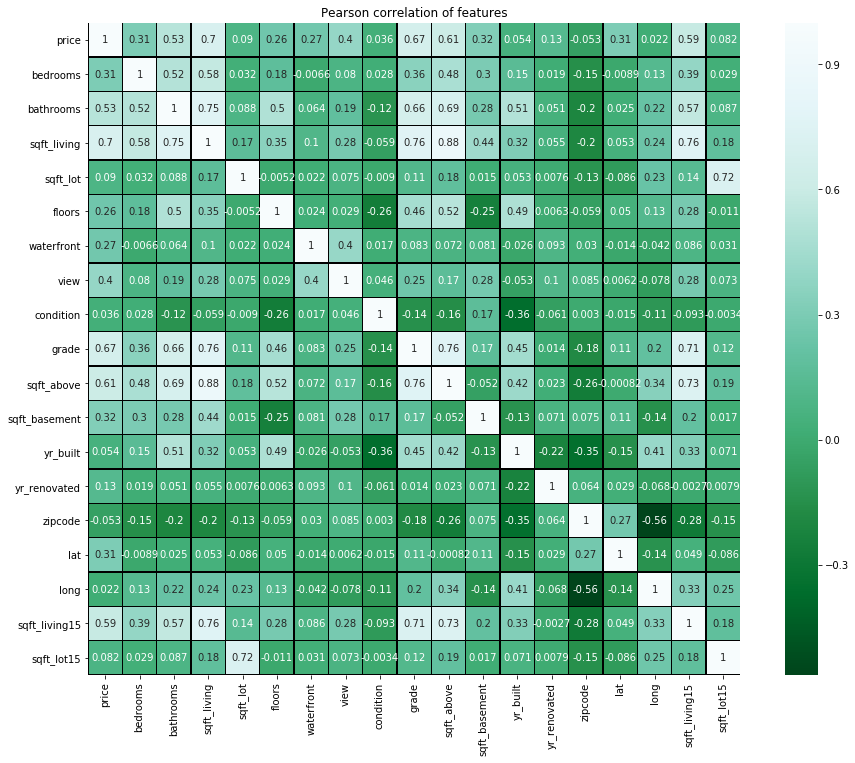

In [111]:
# Draw the heatmap using seaborn to visualise the correlation amongst the variables

plt.figure(figsize = (16,12))
plt.title('Pearson correlation of features')
sns.heatmap(data_corr ,linewidths=0.25,vmax=1.0, square=True, cmap="BuGn_r", linecolor='k', annot=True)

From the above correlation matrix, we see that there is higher correlation of columns 'sqft_living' , 'grade' , 'sqft_above' with the price.
We also see high correlation between the following columns -
1. Bathroom with sqft_living, grade and sqft_above
2. sqft_living with grade, sqft_above and sqft_living15
3. sqft_lot with sqft_lot15
4. grade with sqft_above, sqft_living, sqft_living15
5. sqft_above with sqft_living15

### Continous variables

Now, Let us check the impact of all the __continous variables__ with the target variable, price by visualising using a jointplot. Now, since they are continous variables, we can plot a regression line and check for the value of __Pearson's coefficient r__ to measures the strength and direction of the relationship with target variable price.

Below are all the 10 continous variables in our dataset - 

1. sqft_living <br>
2. sqft_lot <br>
3. sqft_above (i.e., sqft_above = sqft_living - sqft_basement) <br>
4. sqft_basement <br>
5. sqft_living15, the average house square footage of the 15 closest neighbours <br>
6. sqft_lot15, the average lot square footage of the 15 closest neighbours <br>
7. yr_built <br>
8. yr_renovated <br>
9. lat <br>
10. long <br>

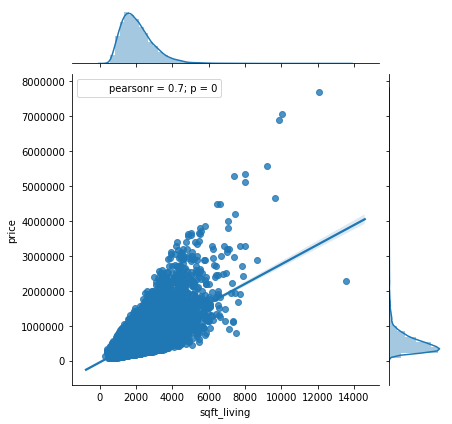

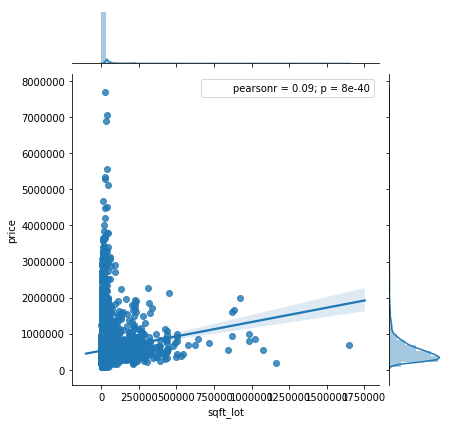

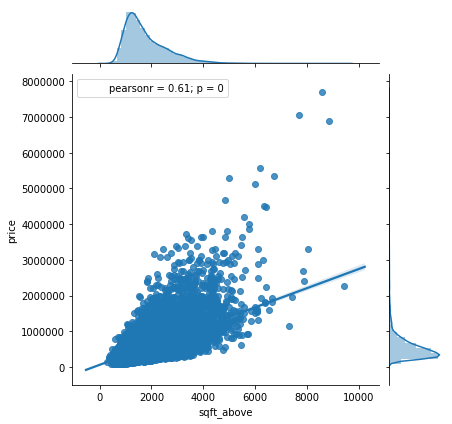

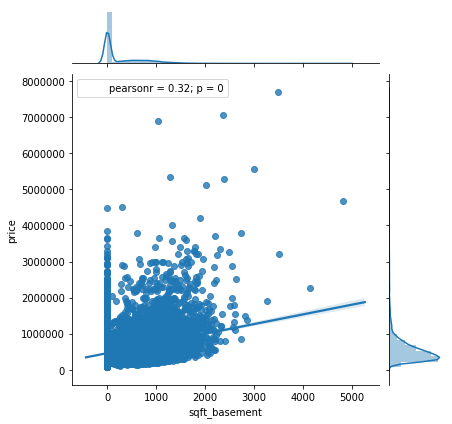

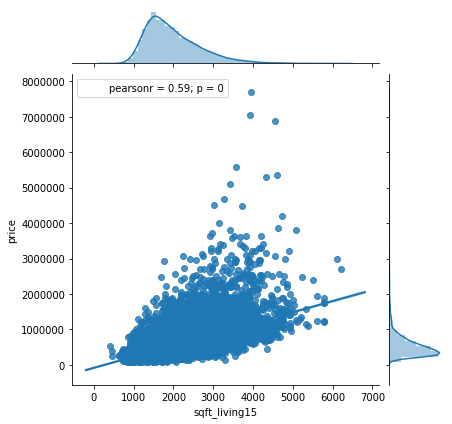

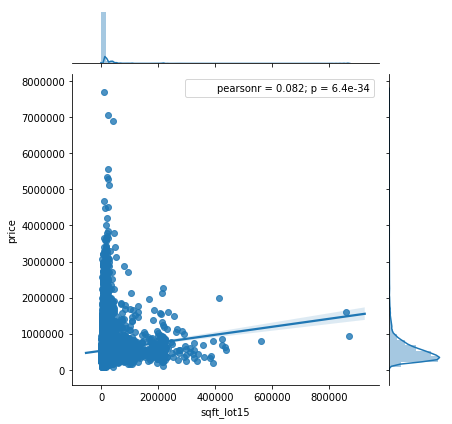

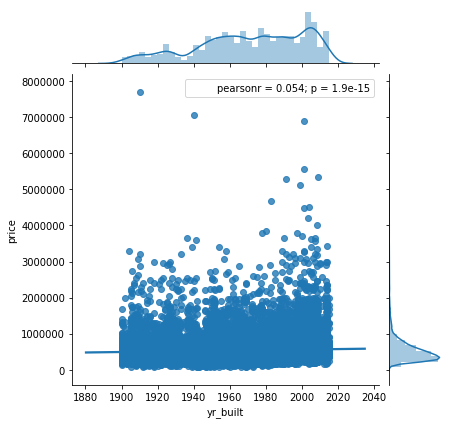

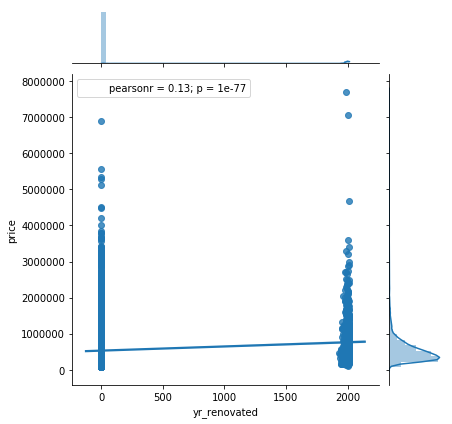

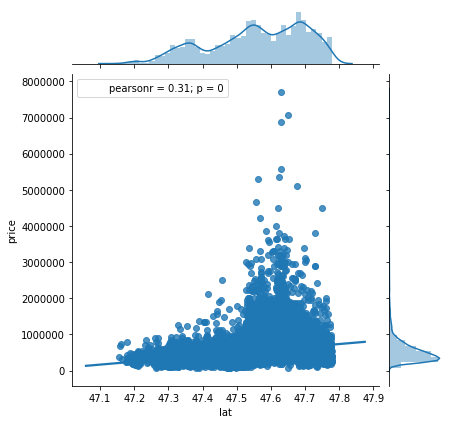

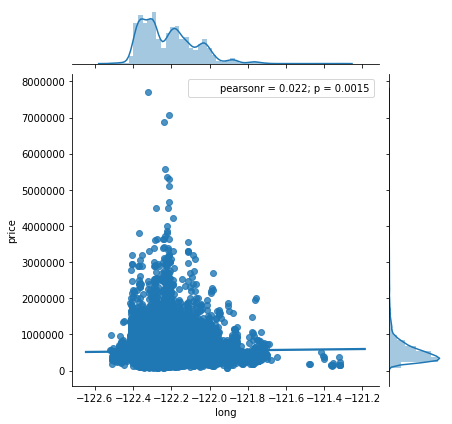

In [112]:
j1 = sns.jointplot(x='sqft_living', y='price', data=dataset, kind='reg', size = 6)
j2 = sns.jointplot(x="sqft_lot", y="price", data=dataset, kind = 'reg', size = 6)
j3 = sns.jointplot(x="sqft_above", y="price", data=dataset, kind = 'reg', size = 6)
j4 = sns.jointplot(x="sqft_basement", y="price", data=dataset, kind = 'reg', size = 6)
j5 = sns.jointplot(x="sqft_living15", y="price", data=dataset, kind = 'reg', size = 6)
j6 = sns.jointplot(x="sqft_lot15", y="price", data=dataset, kind = 'reg', size = 6)
j7 = sns.jointplot(x="yr_built", y="price", data=dataset, kind = 'reg', size = 6)
j8 = sns.jointplot(x="yr_renovated", y="price", data=dataset, kind = 'reg', size = 6)
j9 = sns.jointplot(x="lat", y="price", data=dataset, kind = 'reg', size = 6)
j10 = sns.jointplot(x="long", y="price", data=dataset, kind = 'reg', size = 6)

j1.annotate(stats.pearsonr)
j2.annotate(stats.pearsonr)
j3.annotate(stats.pearsonr)
j4.annotate(stats.pearsonr)
j5.annotate(stats.pearsonr)
j6.annotate(stats.pearsonr)
j7.annotate(stats.pearsonr)
j8.annotate(stats.pearsonr)
j9.annotate(stats.pearsonr)
j10.annotate(stats.pearsonr)

plt.show()

Comments - 

1. There is a clear linear association between the variables (r = 0.7), indicating a strong positive relationship. sqft_living should be a good predicator of house price. (note: sqft_living distribution is also skewed to the right)

2. sqft_lot, sqft_lot15, yr_built and long seem to be very poorly related to price (r<0.1)

3. sqft_above and sqft_living15 also seem to be strongly related to price along with sqft_living. Let's analyse their associations using the pairgrid() function from seaborn. This function creates a matrix of axes and shows the relationship for each pair of the selected variables.

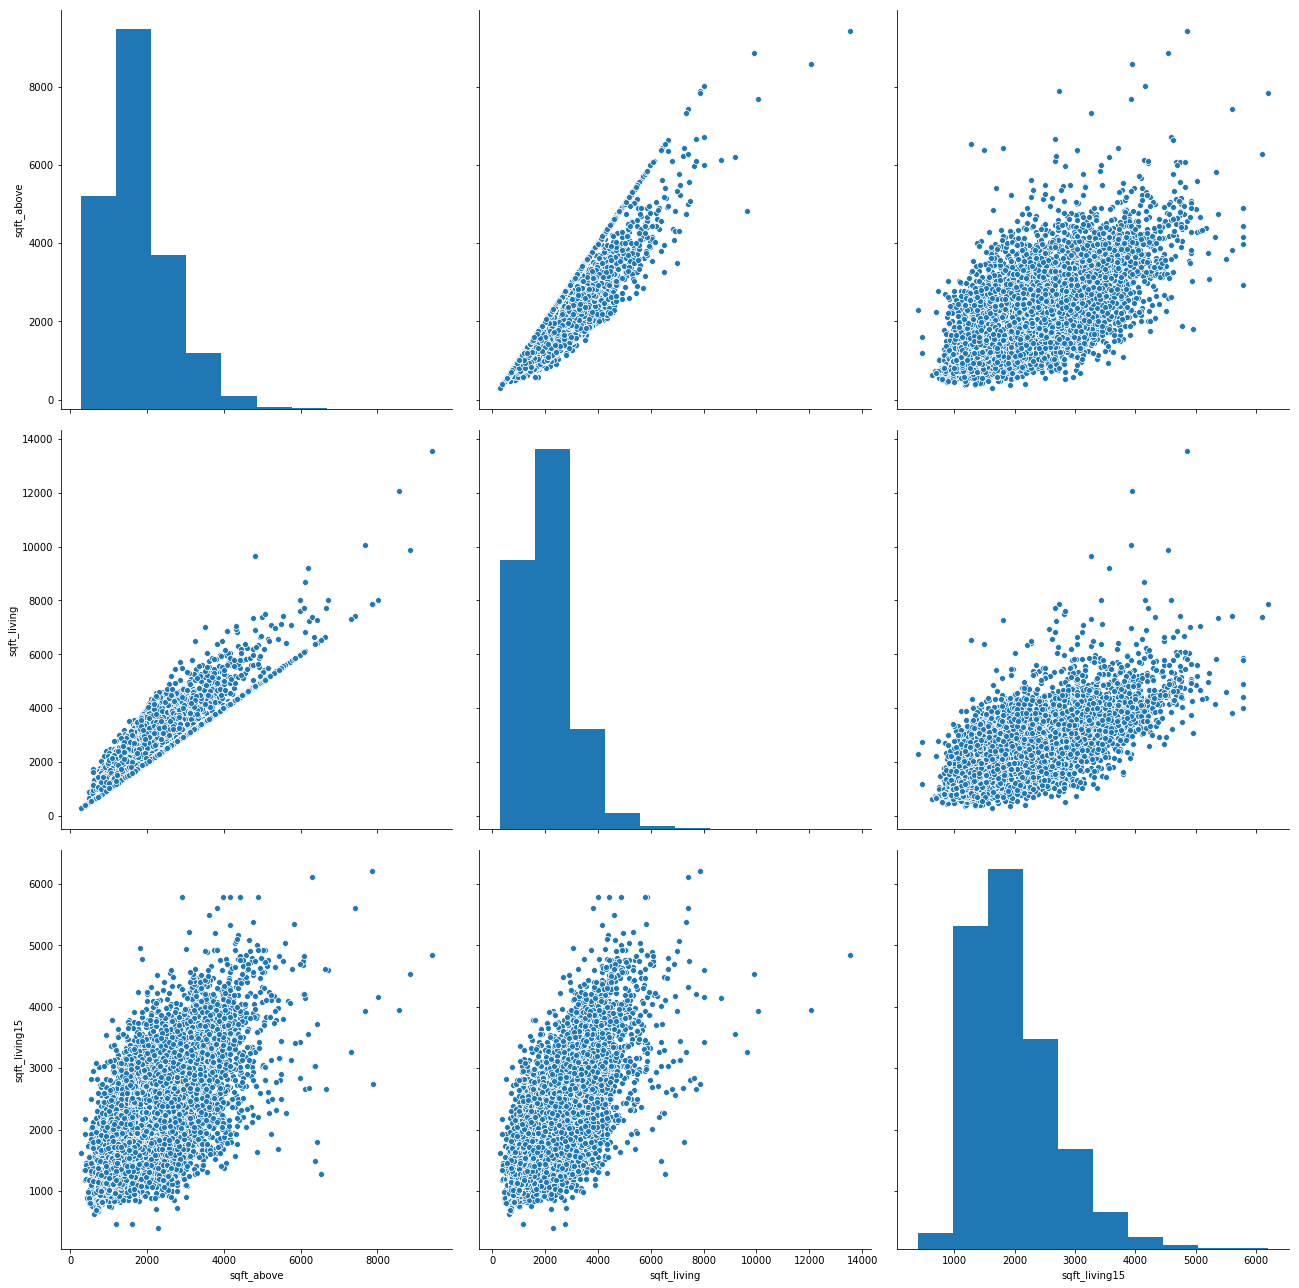

In [113]:
sns.pairplot(dataset[['sqft_above', 'sqft_living','sqft_living15']], palette='tab20',size=6)

From the plot above, it is quite evident that the 3 variables have a strong relationship. It was kind of obvious for sqft_above which is equal to sqft_living - sqft_basement. So we know that they both have an impact on price.

Lets now calculate the __Variance Inflation Factor (VIF)__ for the above variables to know if there exists a multicolinearity amongst them.

In [114]:
X = pd.DataFrame()
X['sqft_above'] = dataset['sqft_above']
X['sqft_living'] = dataset['sqft_living']
X['sqft_living15'] = dataset['sqft_living15']
X

,sqft_above,sqft_living,sqft_living15
0,1180,1180,1340
1,2170,2570,1690
2,770,770,2720
3,1050,1960,1360
4,1680,1680,1800
5,3890,5420,4760
6,1715,1715,2238
7,1060,1060,1650
8,1050,1780,1780
9,1890,1890,2390


In [115]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,25.7,sqft_above
1,30.1,sqft_living
2,15.3,sqft_living15


From the above values which are much greater than the threshold value of 5, it proves that these 3 variables have multicolinearity amongst them. Hence, we would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity. From the above scatter plots for each independent variable, the coefficient r for sqft_living is highest (r=0.7) amongst the 3 and so we include only 1 of these variable in the model.

Now, from the jointplot above we also see that there are many 0's for sqft_basement, yr_renovated, sqft_lot and sqft_lot15. This can be proved via pandas as well as done below. Thus, let's remove these 0's and visualise the associations for these 4 variables.

In [116]:
(dataset['yr_renovated'] == 0).any()

True

In [117]:
(dataset['sqft_basement'] == 0).any()

True

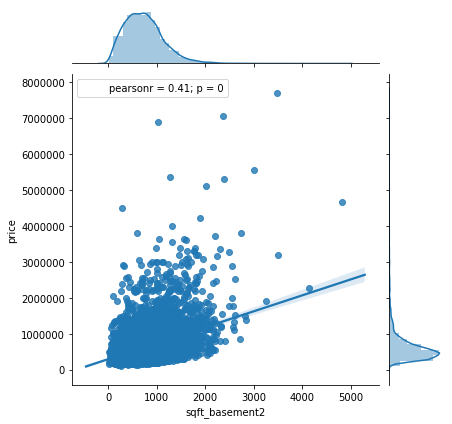

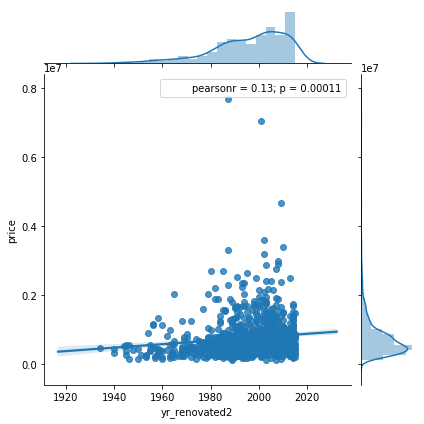

In [118]:
#create 2 new columns which has non zero values for sqft_basement and yr_renovated
dataset['sqft_basement2'] = dataset['sqft_basement'].apply(lambda x : x if x>0 else None)
dataset['yr_renovated2'] = dataset['yr_renovated'].apply(lambda x : x if x>0 else None)

#plot jointplots
jp1 = sns.jointplot(x='sqft_basement2', y='price', data=dataset, kind='reg', dropna = True, size = 6)
jp2 = sns.jointplot(x='yr_renovated2', y='price', data=dataset, kind='reg', dropna = True, size = 6)

jp1.annotate(stats.pearsonr)
jp2.annotate(stats.pearsonr)
plt.show()

From the plot above, we see that the r value for both is quite less. The house price is moderately correlated with the size of the basement (if basement present). This means there is also a small correlation with the year of the renovation (if renovated).

It might be more interesting for our analysis to classify basement and renovation as dichotomous variables (e.g., 0 for no basement, 1 for basement present). Let's create two new columns in our dataset.

In [119]:
dataset['basement_present'] = dataset['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
dataset['basement_present'] = dataset['basement_present'].astype('category', ordered = False)

dataset['is_renovated'] = dataset['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
dataset['is_renovated'] = dataset['is_renovated'].astype('category', ordered = False)

Let us check the associations of these variables with response variable, price in the below section.

### Categorical Variables

Let's now analyze the relationship between house price and the categorical variables. By plotting boxplots for __dichotomous categorical variables__, i.e. waterfront, basement_present and is_renovated, we can measure how much does the presence of each categorical variable impact the price. For doing so, lets use the __point-biserial correlation coefficient__ to highlight the relationship between the two variables.

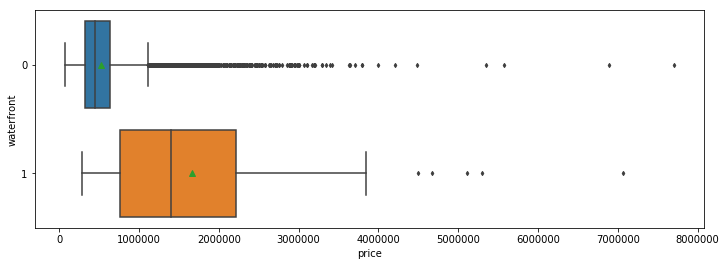

point biserial correlation r for waterfront is 0.2663694340306021 with p = 0.0


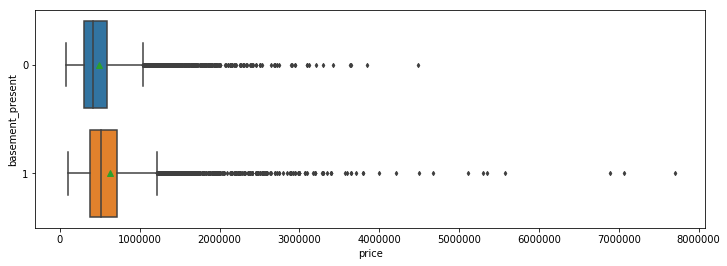

point biserial correlation r for basement_present is 0.18023008665021023 with p = 3.2567787361972933e-157


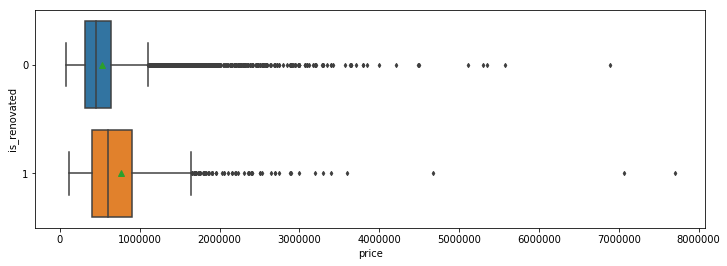

point biserial correlation r for is_renovated is 0.12609226271139487 with p = 2.6401485917732445e-77


In [120]:
# plot boxplot for visualisation of impact of dichotomous categorical variables on target variable price

#waterfront variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y='waterfront', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3, ax=ax)
plt.show()

r, p = stats.pointbiserialr(dataset['waterfront'], dataset['price'])
print ('point biserial correlation r for waterfront is %s with p = %s' %(r,p))

#basement_present variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y='basement_present', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3, ax=ax)
plt.show()
r, p = stats.pointbiserialr(dataset['basement_present'], dataset['price'])
print ('point biserial correlation r for basement_present is %s with p = %s' %(r,p))

#is_renovated variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y='is_renovated', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3, ax=ax)
plt.show()
r, p = stats.pointbiserialr(dataset['is_renovated'], dataset['price'])
print ('point biserial correlation r for is_renovated is %s with p = %s' %(r,p))

Comments -

1. The no waterfront box plot is comparatively short. This suggests that overall, house prices in this group are very close to each other. The waterfront box plot is comparatively tall. This suggests that house prices differ greatly in this group. There is obvious shape differences between the two distributions, suggesting a higher sell price, in general, for houses with a waterfront. This is validated by a positive value of the point-biserial correlation. The correlation if however small (r<0.3). 
<br><br>
2. The box plot for houses without basement is comparatively shorter than houses with basement. This means that the house prices are close to each other for houses without basement. There is a shape difference, suggesting houses with basement have a higher selling price which is validated by positive value of the point-biserial correlation. This correlation is also however small (r<0.2).
<br><br>
3. The box plot for houses which is not renovated is comparatively shorter than houses which are renovated. This means that the house prices are close to each other for houses which are not renovated. There is a shape difference, suggesting renovated houses have a higher selling price which is validated by positive value of the point-biserial correlation. This correlation is also however small (r<0.2).
<br><br>
4. In short, associations do exist amongst them, but it is quite small (0.1<r<0.3)


Let's now analyze the relationship between house price and the __Ordinal categorical variables__. By plotting boxplots for ordinal categorical variables, i.e. bedrooms, bathrooms, floor, view, condition and grade we can measure how much does the presence of each categorical variable impact the price. For doing so, lets use the __Spearman's rank-order correlation coefficient__ to highlight the relationship between these variables.

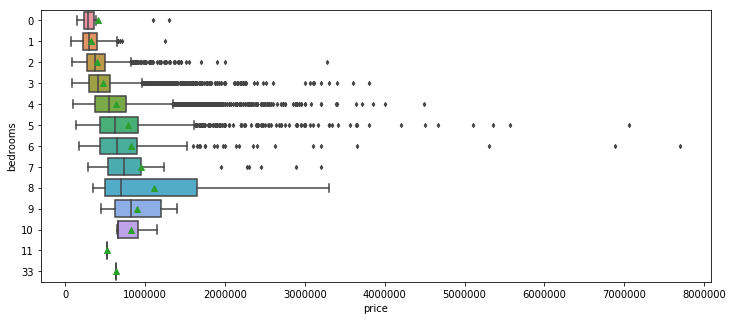

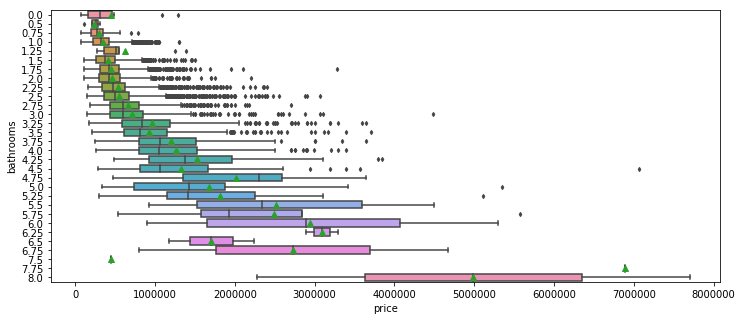

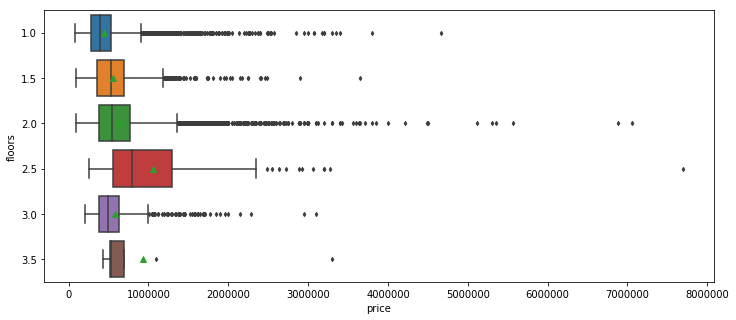

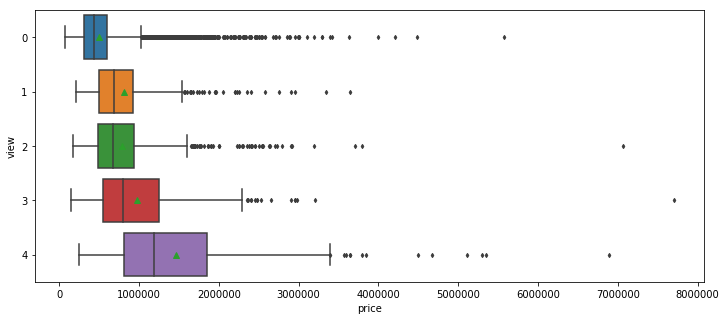

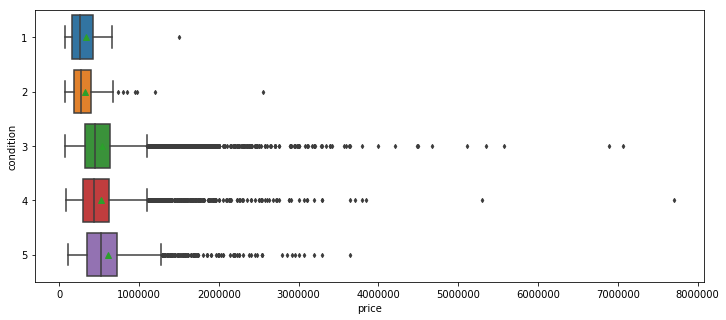

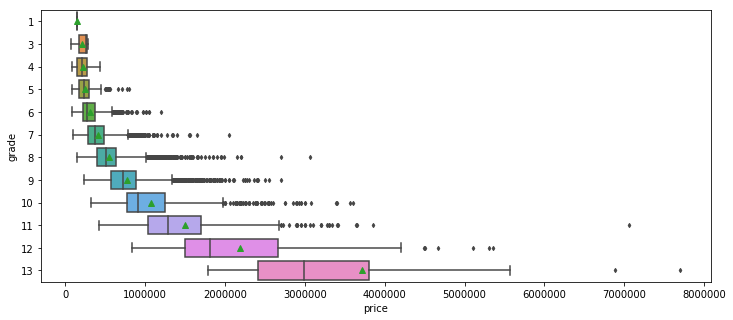

In [121]:
# plot boxplot for visualisation of impact of ordinal categorical variables on target variable price

plt.figure(figsize=(12,5))
sns.boxplot(y='bedrooms', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3)
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(y='bathrooms', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3)
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(y='floors', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3)
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(y='view', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3)
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(y='condition', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3)
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(y='grade', x='price', data=dataset, orient='h', showmeans=True, fliersize = 3)
plt.show()

As expected, they all seem to be linearly related to the house price. There are few outliers though but we ignore them.

We can use the Spearman's rank-order correlation to measure the strength and direction of the relationships between house price and these variables.

In [122]:
r, p = stats.pointbiserialr(dataset['bedrooms'], dataset['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))

r, p = stats.pointbiserialr(dataset['bathrooms'], dataset['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))

r, p = stats.pointbiserialr(dataset['floors'], dataset['price'])
print ('spearman correlation r between price and floor is %s with p = %s' %(r,p))

r, p = stats.pointbiserialr(dataset['view'], dataset['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))

r, p = stats.pointbiserialr(dataset['condition'], dataset['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))

r, p = stats.pointbiserialr(dataset['grade'], dataset['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

spearman correlation r between price and bedrooms is 0.3083495981456383 with p = 0.0
spearman correlation r between price and bathrooms is 0.5251375054139619 with p = 0.0
spearman correlation r between price and floor is 0.2567938875507184 with p = 1.6e-322
spearman correlation r between price and view is 0.3972934882945043 with p = 0.0
spearman correlation r between price and condition is 0.036361789128997554 with p = 8.935654062344094e-08
spearman correlation r between price and grade is 0.6674342560202371 with p = 0.0


Comment -

The above positive value for r shows there is a correlation between all the variables and price. However, except for grade, all other variables are less associated to price (r is less than 0.5 or approximately equal to 0.5 for bathrooms). **Grade** seems to be the best indicator amongst all.

### Test for multivariate normality

The linear regression analysis requires all variables to be multivariate normal.  This assumption can best be checked with a histogram or a Q-Q-Plot.  Normality can also be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.

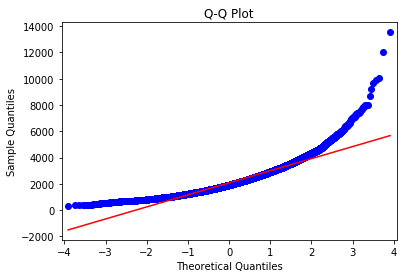

In [123]:
sm.qqplot(dataset['sqft_living'], line='s')
plt.title('Q-Q Plot')
plt.show()

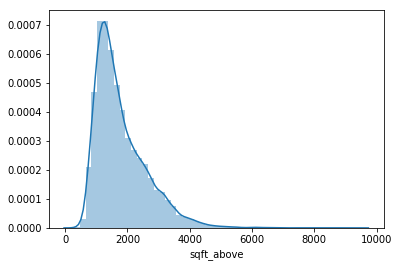

In [124]:
sns.distplot(dataset['sqft_above'])

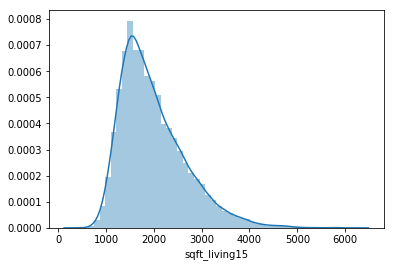

In [125]:
sns.distplot(dataset['sqft_living15'])

The above figures shows that sqft_living, swft_above and sqft_living15 are normally distributed and is right skewed.

### **DATA ANALYSIS - CONCLUSION**

In this post, we analyzed the relationship between the output variable (house price) and the dependent variables in our dataset.

More specifically, we highlighted that:

1. sqft_living, sqft_above and sqft_basement were moderately/strongly associated with price. Pearson r was equal to 0.70, 0.61 and 0.41, respectively. The 3 variables were also strongly related to each other as sqft_living = sqft_above and sqft_basement.


2. sqft_living15, the average house square footage of the 15 closest neighbors, was also strongly related to price (r = 0.59)


3. sqft_lot, sqft_lot15 (average lot size of the 15 closest houses) and yr_built were poorly related to price (r<0.1).


4. The three dichotomous variables (waterfront, basement_present, renovated) were associated with price. The associations were small (r < 0.3)


5. Five of the ordinal parameters (bedrooms, bathrooms, floors, views) were moderately associated with price (0.2<r<0.6), grade was strongly associated to price (r=0.67) whereas condition was least associated with price (r=0.04).

Then, we also checked for various assumptions of the linear model -
1. Predictors are linearly dependent on the response variable
2. Multicollinearity among the features
3. Multivariate Normality
4. Homoscedasticity

## 4. House price prediction using Linear Models

In [126]:
# checking for all columns of dataset
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_basement2', 'yr_renovated2',
       'basement_present', 'is_renovated'],
      dtype='object')

In [127]:
# checking datatypes of all columns
dataset.dtypes

price                float64
bedrooms            category
bathrooms           category
sqft_living            int64
sqft_lot               int64
floors              category
waterfront          category
view                category
condition           category
grade               category
sqft_above             int64
sqft_basement          int64
yr_built               int64
yr_renovated           int64
zipcode                int64
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
sqft_basement2       float64
yr_renovated2        float64
basement_present    category
is_renovated        category
dtype: object

### Simple Linear Regression

Now, lets perform simple linear regression by taking only 1 independent variable which has highest correlation with price. From the heatmap, we saw that sqft_living has highest correlation with price (r=0.7)

So, lets try to train our model using this independent variable and check for its goodness of fit.

In [128]:
# Store independent and dependent variable in X, Y respectively
X = dataset['sqft_living']
Y = dataset['price']

In [129]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [130]:
# Fitting simple linear regression to training set
regressor = linear_model.LinearRegression()
X_train = np.array(X, dtype=pd.Series).reshape(-1,1)
Y_train = np.array(Y, dtype=pd.Series)
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
# Evaluate the simple model
X_test = np.array(X, dtype=pd.Series).reshape(-1,1)
Y_test = np.array(Y, dtype=pd.Series)

In [132]:
# Predicting the test set results
pred = regressor.predict(X_test)

In [133]:
#Applying K-fold cross validation
accuracy = cross_val_score(estimator = regressor, X = X_test, y = Y_test, cv = 5)
accuracy.mean()

0.4910862905377125

Here we use a better technique to compute the estimate of validation errors called **Cross-Validation** technique. k-fold cross-validation technique involves dividing the training set into k folds/segments of roughly equal size. One of the fold is considered as the validation set and remaining as the training sets. The model is then trained on the training set and then we measure the validation error with one of the segments designated as the validation set. This process is repeated k times. Finally, we compute the average of the k validation errors, and use it as an estimate of the generalization error.

The above accuracy is just 49% which shows that our model is not a good estimator of response variable price.

In [134]:
accuracy.std()

0.0065791783527652465

The above value shows that there is 0.65% variance in our model which is quite obvious as we have taken nly one feature to train our model. Thus, it infact has a very high bias.

In [135]:
#Our model needs an intercept so we add a column of it
X = sm.add_constant(X)

In [136]:
# Statistical data exploration
model = sm.OLS(Y,X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:14   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

In [137]:
# Print the coefficients
print('Parameters: ', model.params)
print('R2: ', model.rsquared)

Parameters:  const         -43580.743094
sqft_living      280.623568
dtype: float64
R2:  0.4928532179037932


This means that our best fit line is: $$y = a + b x$$

Which translates in to the equations below:

$$ price = -43580 + 280.62 x_{sqft_living} + \varepsilon $$

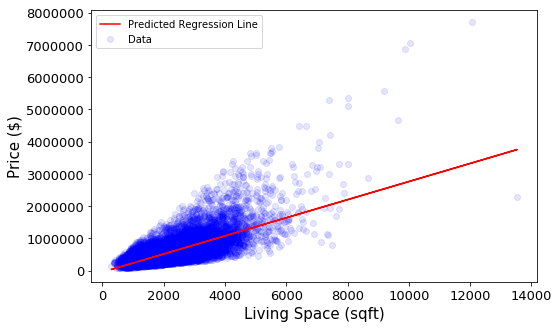

In [138]:
plt.figure(figsize=(8,5))
plt.scatter(X_test,Y_test,color='blue',label="Data", alpha=0.1)
plt.plot(X_test,pred,color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

Comments -

1. Since there is just 1 independent variable, the value of r-square and adjusted r-square remains same (r=0.493). This value was also estimated using k-fold validation technique. It shows that the independent variable 'sqft_living' is a moderate predictor of target variable price and hence is a poor fit to the dataset.

2. From the plot as well, we can see that the regression line fits poorly through the data points.

Hence, to better predict the price we need to add more features and train our model.

### Multiple Linear Regression

In [139]:
# encode independent categorical variables
#labelEncoder_X = LabelEncoder()

# function to encode all categorical variables
#list = [0,1,4,5,6,7,8,13]

#for i in list:
#        x[:, i] = labelEncoder_X.fit_transform(x[:, i])
#        onehotencoder = OneHotEncoder(categorical_features = [i])
#        x = onehotencoder.fit_transform(x).toarray()

data = dataset.copy()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_renovated2,basement_present,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,NaN,NaN,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,400.0,1991.0,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,NaN,NaN,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,910.0,NaN,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,NaN,NaN,0,0


In [140]:
#Let's consider bedrooms and bathrooms as continous variables
data['bedrooms'] = data['bedrooms'].astype('int64')
data['bathrooms'] = data['bathrooms'].astype('float64')

In [141]:
#Check for NaN's
data.isnull().any()

price               False
bedrooms            False
bathrooms           False
sqft_living         False
sqft_lot            False
floors              False
waterfront          False
view                False
condition           False
grade               False
sqft_above          False
sqft_basement       False
yr_built            False
yr_renovated        False
zipcode             False
lat                 False
long                False
sqft_living15       False
sqft_lot15          False
sqft_basement2       True
yr_renovated2        True
basement_present    False
is_renovated        False
dtype: bool

From above, we see that basement_present and is_renovated columns were created from sqft_basement2 and yr_renovated2 columns respectively. Hence, those two columns which contain null values are not going to be used for modelling and so there is no need to fill NaNs for those columns. Also, sqft_basement and yr_renovated features will not be used as we created categorical variables for both. Hence, let us drop these columns.

In [142]:
data.drop(columns=['sqft_basement', 'yr_renovated', 'sqft_basement2', 'yr_renovated2'], inplace = True)

In [143]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'basement_present', 'is_renovated'],
      dtype='object')

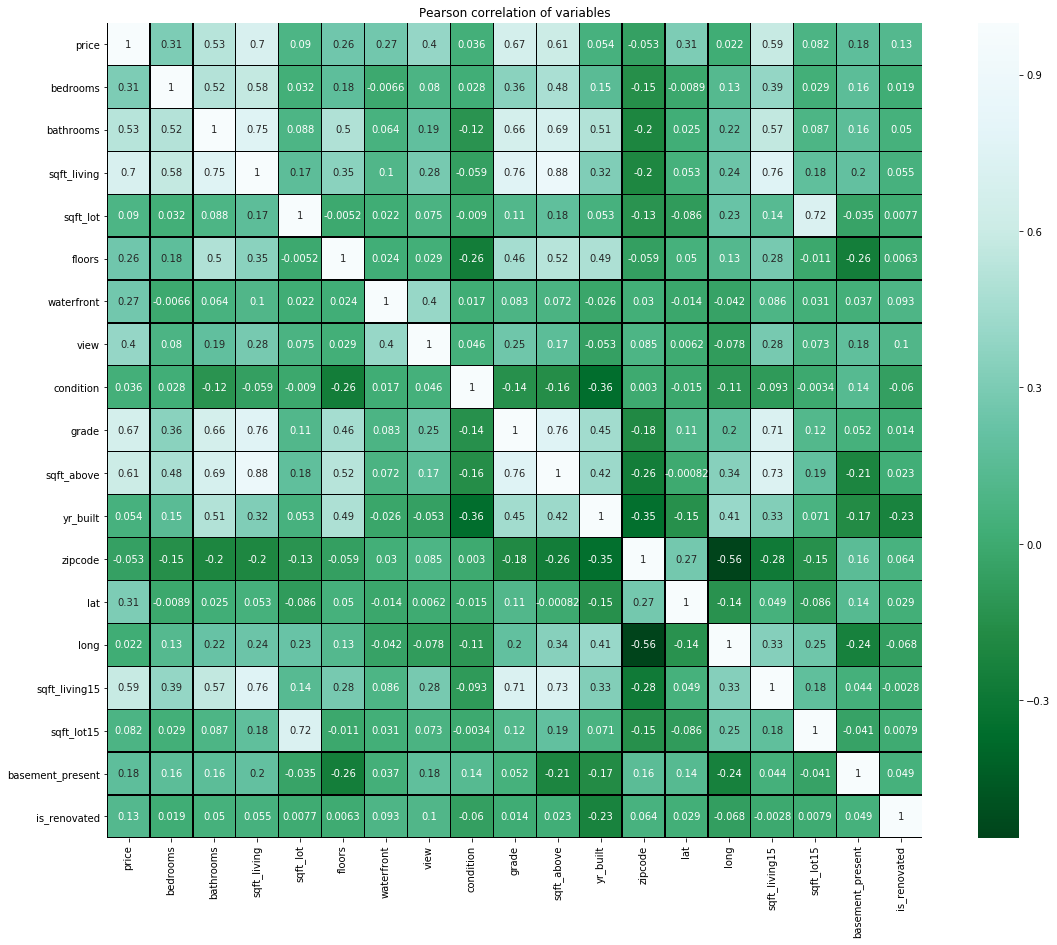

In [144]:
# Draw the heatmap using seaborn to visualise the correlation amongst the variables

plt.figure(figsize = (20,15))
plt.title('Pearson correlation of variables')
sns.heatmap(data.astype('float').corr() ,linewidths=0.25,vmax=1.0, square=True, cmap="BuGn_r", linecolor='k', annot=True)

In [145]:
# encode independent categorical variables
#data = pd.get_dummies(data, columns=['bedrooms', 'bathrooms', 'waterfront', 'floors', 'view','condition','grade','zipcode'])

# From the correlation matrix we see that 
categorial_cols = ['floors', 'view', 'condition', 'grade', 'waterfront', 'basement_present', 'is_renovated']

for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    dummies = dummies.astype('float64')
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)

In [146]:
data.dtypes

price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
sqft_above              int64
yr_built                int64
zipcode                 int64
lat                   float64
long                  float64
sqft_living15           int64
sqft_lot15              int64
floors#1.0            float64
floors#1.5            float64
floors#2.0            float64
floors#2.5            float64
floors#3.0            float64
floors#3.5            float64
view#0                float64
view#1                float64
view#2                float64
view#3                float64
view#4                float64
condition#1           float64
condition#2           float64
condition#3           float64
condition#4           float64
condition#5           float64
grade#1               float64
grade#3               float64
grade#4               float64
grade#5               float64
grade#6               float64
grade#7   

In [147]:
#Create matrix of features i.e. independent variable and dependent variable
#X = data.iloc[:, 1:].values
#y = data['price']

In [148]:
# Split dataset into training and test set
#train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [149]:
# Function to carry out multiple regression
def multiple_regression_model(train, features):
    reg = linear_model.LinearRegression() # Create a linear regression object
    
    #x_train = np.array(features, dtype=pd.Series)
    #y_train = np.array(y, dtype=pd.Series)
    #reg.fit(train.as_matrix(columns = ['price']),train.as_matrix(columns = [features]))
    reg.fit(train[features], train['price'])
    
    #predicting model accuracy
    #pred = reg.predict(test[features])
    
    # Statistical data exploration
    #train[features] = sm.add_constant(train[features])
    
    result = sm.OLS(train['price'], train[features]).fit()
    print (result.summary())
    
    #Applying K-fold cross validation
    score = cross_val_score(estimator = reg , X = train[features], y = train['price'], cv = 5)
    
    print('Mean Score:' + str(score.mean()))
    print('Variance Score:' + str(score.std()))

In [150]:
 multiple_regression_model(data, ['sqft_living','sqft_above'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 5.641e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:19   Log-Likelihood:            -3.0030e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   284.1042      3.833     74.111      

Comments - 

The value of R-square and adjusted R-square is 0.838 and the p-value for both predictors are highly significant which means these variables are great predictors of target variable price.

In [151]:
multiple_regression_model(data, ['sqft_living','sqft_above','sqft_living15'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 3.780e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:19   Log-Likelihood:            -3.0025e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21610   BIC:                         6.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     265.0610      4.291     61.772

We had already seen above that there is strong correlation between these 3 features. This can be seen from the table above where the values for R square, adjusted R square, AIC, BIC is all same. This shows that adding sqft_living15 has no additional impact on the future housing price prediction. Thus this feature will be removed and not used further for training the model.

In [152]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#1'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 3.760e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:19   Log-Likelihood:            -3.0030e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21610   BIC:                         6.006e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   284.1048      3.834     74.110      

From the table above, we see that the values for R square, adjusted R square, AIC, BIC is all same as the previous model. Also, the p-value is quite high which shows that the feature is not significant and that adding grade#1 has no additional impact on the future housing price prediction. Thus this feature will be removed and not used further for training the model.

In [153]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#3'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 3.760e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:19   Log-Likelihood:            -3.0030e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21610   BIC:                         6.006e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   284.1068      3.834     74.110      

From the table above, we see that the values for R square, adjusted R square, AIC, BIC is all same as the previous model. Also, the p-value is quite high which shows that the feature is not significant and that adding grade#2 has no additional impact on the future housing price prediction. Thus this feature will be removed and not used further for training the model.

In [154]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 3.825e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:19   Log-Likelihood:            -3.0015e+05
No. Observations:               21613   AIC:                         6.003e+05
Df Residuals:                   21610   BIC:                         6.003e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   294.6033      3.852     76.474      

Here, we see that adding grade#7 increases the value of adjusted R-square and the p-value is highly significant thereby increasing the model prediction and accuracy.

In [155]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 2.918e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:19   Log-Likelihood:            -2.9999e+05
No. Observations:               21613   AIC:                         6.000e+05
Df Residuals:                   21609   BIC:                         6.000e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   305.2963      3.872     78.853      

By adding grade#8, the acuuracy of model is slightly improved so we keep this feature.

In [156]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.355e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:19   Log-Likelihood:            -2.9991e+05
No. Observations:               21613   AIC:                         5.998e+05
Df Residuals:                   21608   BIC:                         5.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   300.9867      3.873     77.721      

By adding grade#10, the acuuracy of model is slightly improved so we keep this feature.

In [157]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.034e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:19   Log-Likelihood:            -2.9958e+05
No. Observations:               21613   AIC:                         5.992e+05
Df Residuals:                   21607   BIC:                         5.992e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   291.6297      3.831     76.118      

By adding grade#11, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [158]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.834e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:20   Log-Likelihood:            -2.9912e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21606   BIC:                         5.983e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   281.5433      3.764     74.795      

By adding grade#12, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [159]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 1.671e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:20   Log-Likelihood:            -2.9874e+05
No. Observations:               21613   AIC:                         5.975e+05
Df Residuals:                   21605   BIC:                         5.976e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   274.9232      3.707     74.158      

By adding grade#13, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [160]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:20   Log-Likelihood:            -2.9867e+05
No. Observations:               21613   AIC:                         5.974e+05
Df Residuals:                   21604   BIC:                         5.974e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   249.5912      4.246     58.784      

By adding bathrooms as feature, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [161]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.352e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:20   Log-Likelihood:            -2.9863e+05
No. Observations:               21613   AIC:                         5.973e+05
Df Residuals:                   21603   BIC:                         5.974e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   244.8612      4.279     57.222      

By adding view#0 as feature, the acuuracy of model is not improved as the adjusted R square value remains same but p-value is highly significant so we keep this feature.

In [162]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:20   Log-Likelihood:            -2.9860e+05
No. Observations:               21613   AIC:                         5.972e+05
Df Residuals:                   21602   BIC:                         5.973e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   242.7603      4.280     56.720      

By adding view#1 as feature, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [163]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:20   Log-Likelihood:            -2.9856e+05
No. Observations:               21613   AIC:                         5.972e+05
Df Residuals:                   21601   BIC:                         5.972e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   239.7458      4.288     55.914      

By adding view#2 as feature, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [164]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.060e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:20   Log-Likelihood:            -2.9846e+05
No. Observations:               21613   AIC:                         5.969e+05
Df Residuals:                   21600   BIC:                         5.970e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   231.1064      4.307     53.662      

By adding view#3 as feature, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [165]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'view#4'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2601.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:21   Log-Likelihood:            -2.9742e+05
No. Observations:               21613   AIC:                         5.949e+05
Df Residuals:                   21599   BIC:                         5.950e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   199.4015      4.162     47.911      

Adding this feature decreases the accuracy drastically as adjusted R square value drops to 0.611. Hence, we eliminate this feature while training our model.

In [166]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'bedrooms'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     9840.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:21   Log-Likelihood:            -2.9846e+05
No. Observations:               21613   AIC:                         5.969e+05
Df Residuals:                   21599   BIC:                         5.971e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   232.8889      4.620     50.411      

Here, we see that although bedrooms should have an impact on price as per our domain knowledge but the p-value says that it is less significant. Also, the value of adjusted R square remains the same as previous model and so we eliminate this feature.

In [167]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:21   Log-Likelihood:            -2.9735e+05
No. Observations:               21613   AIC:                         5.947e+05
Df Residuals:                   21599   BIC:                         5.948e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   197.7736      4.149     47.670      

By adding lat as feature, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [168]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.065e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:21   Log-Likelihood:            -2.9705e+05
No. Observations:               21613   AIC:                         5.941e+05
Df Residuals:                   21598   BIC:                         5.943e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    199.7232      4.094     48.783   

By adding waterfront#0 as feature, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [169]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'waterfront#1'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     3167.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:21   Log-Likelihood:            -2.9504e+05
No. Observations:               21613   AIC:                         5.901e+05
Df Residuals:                   21597   BIC:                         5.902e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    176.5361      3.745     47.134   

Here, although the p-value says that it is quite significant but the value of adjusted R square drops to 0.687 which leads to poor acuracy and so we eliminate this feature.

In [170]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.0'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:21   Log-Likelihood:            -2.9701e+05
No. Observations:               21613   AIC:                         5.941e+05
Df Residuals:                   21597   BIC:                         5.942e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    212.9725      4.332     49.161   

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase which means it does not have any additional impact on price and so we eliminate this feature.

In [171]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:22   Log-Likelihood:            -2.9694e+05
No. Observations:               21613   AIC:                         5.939e+05
Df Residuals:                   21597   BIC:                         5.940e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    197.1436      4.076     48.369   

By adding floors#1.5, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [172]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.0'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     9531.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:22   Log-Likelihood:            -2.9692e+05
No. Observations:               21613   AIC:                         5.939e+05
Df Residuals:                   21596   BIC:                         5.940e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    189.4928      4.290     44.170   

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase which means it does not have any additional impact on price and so we eliminate this feature.

In [173]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     9580.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:22   Log-Likelihood:            -2.9687e+05
No. Observations:               21613   AIC:                         5.938e+05
Df Residuals:                   21596   BIC:                         5.939e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    196.7394      4.064     48.411   

By adding floors#2.5, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [174]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'floors#3.0'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     9088.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:22   Log-Likelihood:            -2.9683e+05
No. Observations:               21613   AIC:                         5.937e+05
Df Residuals:                   21595   BIC:                         5.938e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    203.2473      4.116     49.380   

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase which means it does not have any additional impact on price and so we eliminate this feature.

In [175]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'floors#3.5'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     9051.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:23   Log-Likelihood:            -2.9687e+05
No. Observations:               21613   AIC:                         5.938e+05
Df Residuals:                   21595   BIC:                         5.939e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    196.8294      4.063     48.440   

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase which means it does not have any additional impact on price and so we eliminate this feature.

In [176]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     9098.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:23   Log-Likelihood:            -2.9682e+05
No. Observations:               21613   AIC:                         5.937e+05
Df Residuals:                   21595   BIC:                         5.938e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          145.9461      6

By adding basement_present#0, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [177]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'basement_present#1'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2691.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:23   Log-Likelihood:            -2.9489e+05
No. Observations:               21613   AIC:                         5.898e+05
Df Residuals:                   21594   BIC:                         5.900e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          152.3461      5

Here, although the p-value says that it is quite significant but the value of adjusted R square decreases drastically leading to poor accuracy and so we eliminate this feature.

In [178]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     8740.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:23   Log-Likelihood:            -2.9669e+05
No. Observations:               21613   AIC:                         5.934e+05
Df Residuals:                   21594   BIC:                         5.936e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          142.9351      6

By adding gis_renovated#0, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [179]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'is_renovated#1'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2591.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:23   Log-Likelihood:            -2.9477e+05
No. Observations:               21613   AIC:                         5.896e+05
Df Residuals:                   21593   BIC:                         5.897e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          149.6741      5

Here, although the p-value says that it is quite significant but the value of adjusted R square decreases drastically leading to poor accuracy and so we eliminate this feature.

In [180]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     8337.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:24   Log-Likelihood:            -2.9665e+05
No. Observations:               21613   AIC:                         5.933e+05
Df Residuals:                   21593   BIC:                         5.935e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          145.2619      6

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase which means it does not have any additional impact on price and so we eliminate this feature.

In [181]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     8366.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:24   Log-Likelihood:            -2.9661e+05
No. Observations:               21613   AIC:                         5.933e+05
Df Residuals:                   21593   BIC:                         5.934e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          147.0883      6

By adding sqft_lot15, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [182]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     8863.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:24   Log-Likelihood:            -2.9559e+05
No. Observations:               21613   AIC:                         5.912e+05
Df Residuals:                   21592   BIC:                         5.914e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          108.0761      6

By adding yr_built, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [183]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     9657.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:24   Log-Likelihood:            -2.9430e+05
No. Observations:               21613   AIC:                         5.886e+05
Df Residuals:                   21591   BIC:                         5.888e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          123.6634      5

By adding zipcode, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [184]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode', 'long'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     9399.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:24   Log-Likelihood:            -2.9413e+05
No. Observations:               21613   AIC:                         5.883e+05
Df Residuals:                   21590   BIC:                         5.885e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          126.7266      5

By adding long, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [185]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode', 'long', 'condition#1'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     9012.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:25   Log-Likelihood:            -2.9412e+05
No. Observations:               21613   AIC:                         5.883e+05
Df Residuals:                   21589   BIC:                         5.885e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          126.7309      5

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase which means it does not have any additional impact on price and so we eliminate this feature.

In [186]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode', 'long', 'condition#2'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     9011.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:25   Log-Likelihood:            -2.9412e+05
No. Observations:               21613   AIC:                         5.883e+05
Df Residuals:                   21589   BIC:                         5.885e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          126.4099      5

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase which means it does not have any additional impact on price and so we eliminate this feature.

In [187]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode', 'long', 'condition#3'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     9072.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:25   Log-Likelihood:            -2.9406e+05
No. Observations:               21613   AIC:                         5.882e+05
Df Residuals:                   21589   BIC:                         5.884e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          119.0306      5

By adding condition#3, the acuuracy of model is slightly improved as the adjusted R square value slightly increases and p-value is highly significant so we keep this feature.

In [188]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode', 'long', 'condition#3', 'condition#4'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     8723.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:25   Log-Likelihood:            -2.9404e+05
No. Observations:               21613   AIC:                         5.881e+05
Df Residuals:                   21588   BIC:                         5.883e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          118.3543      5

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase. But the score did slightly increase which means it does have slight impact on price and so we keep this feature.

In [189]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode', 'long', 'condition#3', 'condition#4', 'condition#5'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     8410.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:26   Log-Likelihood:            -2.9401e+05
No. Observations:               21613   AIC:                         5.881e+05
Df Residuals:                   21587   BIC:                         5.883e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          116.7657      5

Here, although the p-value says that it is quite significant but the value of adjusted R square does not increase. But the score does increase and so we which means it does slightly have an impact on price and so we keep this feature.

## 4. INTERACTION EFFECT

In [190]:
# bedrooms times bathrooms gives what's called an "interaction" feature. It is large when both of them are large.
data['bed_bath_rooms'] = data['bedrooms']*data['bathrooms']

We earlier saw that bedroom alone does not have a significant effect on price. But it has a combined effect with bathroom on price. Let us now remove bathroom as feature and include the interaction term 'bed_bath_rooms' in our model and check its impact on the score.

In [191]:
multiple_regression_model(data, ['sqft_living','sqft_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bed_bath_rooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode', 'long', 'condition#3', 'condition#4', 'condition#5'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     8327.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:53   Log-Likelihood:            -2.9411e+05
No. Observations:               21613   AIC:                         5.883e+05
Df Residuals:                   21587   BIC:                         5.885e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living          125.1312      5

On adding this interaction term, we see that the combined interaction effect of bedrooms and bathrooms decreased the score to 0.7057. The value of AIC, BIC also increases. This means it gave us poor results meaning there is not a  significant synergy effect in these features.

In [192]:
# sqft_living times sqft_above gives what's called an "interaction" feature. It is large when both of them are large.
data['sqft_living_above'] = data['sqft_living']*data['sqft_above']

Let us now remove both individual features and include the interaction term 'sqft_living_above' in our model and check its impact on the score.

In [193]:
multiple_regression_model(data, ['sqft_living_above','grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12', 'grade#13', 'bathrooms', 'view#0', 'view#1', 'view#2', 'view#3', 'lat', 'waterfront#0', 'floors#1.5', 'floors#2.5', 'basement_present#0', 'is_renovated#0', 'sqft_lot15', 'yr_built', 'zipcode', 'long', 'condition#3', 'condition#4', 'condition#5'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     8750.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        04:58:54   Log-Likelihood:            -2.9401e+05
No. Observations:               21613   AIC:                         5.881e+05
Df Residuals:                   21588   BIC:                         5.883e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living_above      0.0335      0

On adding this interaction term, we see that the combined interaction effect of sqft_living and sqft_above decreased the score to 0.7082. This means it gave us poor results meaning there is not a significant synergy effect in these features.

# 5. Regression with other ML techniques

We will now use the same selected features as above with other ML techniques to check for the accuracy and compare models

In [197]:
data.drop(['bedrooms' , 'sqft_lot' , 'sqft_living15' , 'floors#1.0' , 'floors#2.0' , 'floors#3.0' , 'floors#3.5' , 
'view#4' , 'condition#1' , 'condition#2' , 'grade#1' , 'grade#3' , 'grade#4' , 'grade#5' , 'grade#6' , 'grade#9' , 
'waterfront#1' , 'basement_present#1' , 'is_renovated#1'], axis=1, inplace=True)

In [199]:
data.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_above', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'floors#1.5', 'floors#2.5',
       'view#0', 'view#1', 'view#2', 'view#3', 'condition#3', 'condition#4',
       'condition#5', 'grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'waterfront#0', 'basement_present#0', 'is_renovated#0',
       'bed_bath_rooms', 'sqft_living_above'],
      dtype='object')

In [200]:
data.drop(['bed_bath_rooms' , 'sqft_living_above'], axis=1, inplace=True)

In [201]:
data.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_above', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'floors#1.5', 'floors#2.5',
       'view#0', 'view#1', 'view#2', 'view#3', 'condition#3', 'condition#4',
       'condition#5', 'grade#7', 'grade#8', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'waterfront#0', 'basement_present#0', 'is_renovated#0'],
      dtype='object')

In [202]:
X = data.drop("price",axis=1).values
y = data["price"].values

In [209]:
#importing libraries
from sklearn.ensemble import RandomForestRegressor
from time import time

In [206]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

### Random Forest Regression

In [210]:
#fitting the model and estimating the time
rand_regr = RandomForestRegressor(n_estimators=100,random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end=time()
train_time_rand=end-start

In [211]:
#predict on test data
predictions = rand_regr.predict(X_test)

In [212]:
#estimating the test score
rand_score = rand_regr.score(X_test,y_test)

In [220]:
#estimating the variance
exp_rand = explained_variance_score(predictions,y_test)

In [213]:
rand_score

0.8631069617192013

In [214]:
train_time_rand

12.045967102050781

In [221]:
exp_rand

0.8306717417261847

Thus, we see that by using a random forest regressor, the accuracy is achieved to **86.31%** and the time taken was 12seconds with variance of about 83%

### Decision Tree Regression

In [216]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

decision=DecisionTreeRegressor()
start = time()
decision.fit(X_train, y_train)
end=time()
train_time_dec=end-start

dec_score=decision.score(X_test,y_test)

decpredict = decision.predict(X_test)

exp_dec = explained_variance_score(decpredict,y_test)

In [217]:
dec_score

0.7640783507230333

In [219]:
exp_dec

0.7543590682408522

In [222]:
train_time_dec

0.2213420867919922

Thus, we see that by using a decision tree regressor, the accuracy is achieved to **76.4%** and the time taken was 0.22seconds with variance of about 75.43%

### Gradient Boosting Regressor

In [224]:
from sklearn.ensemble import GradientBoostingRegressor

start = time()
est=GradientBoostingRegressor(n_estimators=100, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
end=time()
train_time_gb=end-start

gradient_score = est.score(X_test,y_test)

pred = est.predict(X_test)

exp_est = explained_variance_score(pred,y_test)

In [225]:
gradient_score

0.8744952692218412

In [226]:
exp_est

0.84213620210186

In [227]:
train_time_gb

4.559913158416748

Thus, we see that by using a gradient boosting regressor, the accuracy is achieved to **87.45%** and the time taken was 4.55seconds with variance of about 84.21%

### Ada Boosting Regressor

In [240]:
from sklearn.ensemble import AdaBoostRegressor

start = time()
ada=AdaBoostRegressor(n_estimators=100, learning_rate=0.1,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start

pred=ada.predict(X_test)

ada_score=ada.score(X_test,y_test)

predict = ada.predict(X_test)

exp_ada = explained_variance_score(predict,y_test)

In [241]:
ada_score

0.6649084283937605

In [242]:
exp_ada

0.5367038482486108

In [243]:
models_cross = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting', 'Ada Boosting', 'Random Forest','Decision Tree'],
    'Score': [accuracy.mean(),gradient_score,ada_score,rand_score,dec_score],
     'Variance Score': [accuracy.std(),exp_est,exp_ada,exp_rand,exp_dec]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
1,Gradient Boosting,0.874495,0.842136
3,Random Forest,0.863107,0.830672
4,Decision Tree,0.764078,0.754359
2,Ada Boosting,0.664908,0.536704
0,Linear Regression,0.491086,0.006579


## 5. CONCLUSION

Hence, by using a greedy approach for model selection,i.e. forward stepwise selection we get 24 significant parameters in order to predict the future price for this housing dataset. Different models were used to predict the accuracy and here we see that the **accuracy of gradient boosting** is around **87.45%** and also achieved decent **variance score of 0.87** which is very close to 1 . Therefore, it is inferred that Gradient Boosting is the suitable model for this dataset.